<h3>Introduccion</h3>

Las zonas costeras en Colombia presentan diversas problemáticas ambientales, entre las principales se encuentra la inadecuada 
disposición de residuos municipales líquidos y sólidos, que generan vertimientos de aguas residuales con alta carga de contaminantes provenientes de fuentes puntuales y difusas por 
escorrentías urbanas, agrícolas o a través de los ríos que llegan al mar directamente (VivasAguas., et al. 2014; INVEMAR; 2023).
El indice de calidad del agua marina
...
...

# Tabla de contenido

- [1. Carga y exploración de datos](#exploracion)

    - [1.1 Limpieza de datos](#limpieza)

    - [1.2 Análisis estádistico](#analisis)

- [2. Evolución del ICAM año tras año por departamentos](#evolucion-icam)

- [3. Gráfica de la concentraicon de todos los contaminantes a lo largo de los años](#concentracion)

- [4. Comportamiento de la calidad del ICAM por contaminante. Mejora o empeora?](#ICAM)
   - [4.1.  Comparacion por cada contaminante cada año (sin grafica)](#por-año)
   - [4.2.  Comparacion por cada contaminante en promedio (sin grafica)](#promedio)
   - [4.3.  Que estaciones tienen mas contaminacion por año y en promedio (con las principales y sin grafica)](#estaciones) 

- [5. ¿Qué variable está más asociada a un bajo ICAM? (Matriz de correlacion)](#matriz)

- [6. Grafica de categorias. Comportamiento de las variables numericas en funcion de las categoricas](#graf-categoria)

- [7. Gráficas de dispersión (scatter plots) con color según calificación.](#dispersion)

- [8. Mapa de georeferenciacion de las estaciones.](#mapa)
    - [8.1 mapa de calor](#mcalor)

- [9.¿Mayor número de variables medidas implica mejor "confianza" en el ICAM?](#confianza)
    - [9.1. Gráfica Scatter plot entre num_variables vs confianza. Relación entre el número de variables medidas y la confianza](#scatterplot)
    - [9.2. 12. Numero de variables por año](#cajas)
- [10. Conclusiones](#conclusiones)
   

<h3 id="exploracion">1. Carga y exploración de datos</h3>

In [99]:
### importar librerias necesarias 
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
!pip install scikit-learn        ## para realizar imputacion de datos KNN
!pip install folium
!pip install scikit-learn

## Cargar la base de datos y ver las primeras filas con head 
df_icam = pd.read_csv(r'C:\Users\CATALINA\OneDrive\Desktop\proyectoICAM\ReporteICAM.csv') 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\CATALINA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '##': Expected package name at the start of dependency specifier
    ##
    ^


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\CATALINA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\CATALINA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [100]:
df_icam.head()

,ano,muestreo,departamento,estacion,coduer,sustrato,latitud,longitud,ca_cla,ca_cte,...,hdd,no3,od,ph,po4,sst,icam,icam_calificacion,num_variables,confianza
0,2018,2018--2,ATLANTICO,Bocas de Ceniza (B),C08001003,Agua Estuarina,11.104833,-74.853778,84.38,23.94,...,0.24,234.0,5.41,7.31,42.0,242.0,36.00,INADECUADA,7,0.87
1,2018,2018--1,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,21.19,93.86,...,0.18,-1.0,8.76,8.31,7.0,49.9,67.46,ACEPTABLE,6,0.78
2,2018,2018--2,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,47.18,82.66,...,0.16,12.9,9.42,8.25,-1.0,134.0,70.44,ADECUADA,6,0.75
3,2018,2018--1,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,22.16,NaN,...,0.47,6870.0,6.30,7.88,407.0,42.3,20.43,PESIMA,6,0.73
4,2018,2018--2,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,39.76,12.26,...,0.31,497.0,7.25,7.93,469.0,51.9,19.55,PESIMA,7,0.87


In [101]:
## Esta base de datos tiene 1.715 filas y 39 columnas
df_icam.shape

(1715, 39)

In [102]:
df_icam.dtypes

ano                    int64
muestreo              object
departamento          object
estacion              object
coduer                object
sustrato              object
latitud              float64
longitud             float64
ca_cla               float64
ca_cte               float64
ca_cot               float64
ca_hdd               float64
ca_no3               float64
ca_od                float64
ca_ph                float64
ca_po4               float64
ca_sst               float64
eval_cla              object
eval_cte              object
eval_cot              object
eval_hdd              object
eval_no3              object
eval_od               object
eval_ph               object
eval_sst              object
eval_po4              object
cot                  float64
cla                  float64
cte                  float64
hdd                  float64
no3                  float64
od                   float64
ph                   float64
po4                  float64
sst           

In [103]:
df_icam.columns

Index(['ano', 'muestreo', 'departamento', 'estacion', 'coduer', 'sustrato',
       'latitud', 'longitud', 'ca_cla', 'ca_cte', 'ca_cot', 'ca_hdd', 'ca_no3',
       'ca_od', 'ca_ph', 'ca_po4', 'ca_sst', 'eval_cla', 'eval_cte',
       'eval_cot', 'eval_hdd', 'eval_no3', 'eval_od', 'eval_ph', 'eval_sst',
       'eval_po4', 'cot', 'cla', 'cte', 'hdd', 'no3', 'od', 'ph', 'po4', 'sst',
       'icam', 'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [104]:
pd.unique(df_icam['departamento'])    #12 departamentos

array(['ATLANTICO', 'BOLIVAR', 'CAUCA', 'CHOCO', 'CORDOBA', 'LA GUAJIRA',
       'MAGDALENA', 'NARIÑO', 'SAN ANDRES ISLAS', 'SUCRE',
       'VALLE DEL CAUCA', 'ANTIOQUIA'], dtype=object)

In [105]:
pd.unique(df_icam['sustrato'])   ##

array(['Agua Estuarina', 'Agua Marina'], dtype=object)

<h3 id="exploracion">1.1 Limpieza de datos</h3>

In [144]:
df_icam.dtypes

año                                         int64
muestreo                                   object
departamento                               object
estacion                                   object
codigo_estacion                            object
sustrato                                   object
latitud                                   float64
longitud                                  float64
calidad_clorofilaa                        float64
calidad_coliformes_termotolerantes        float64
calidad_nitratos                          float64
calidad_oxigeno_disuelto                  float64
calidad_ph                                float64
calidad_ortofosfatos                      float64
calidad_sst                               float64
evaluacion_clorofilaa                    category
evaluacion_coliformes_termotolerantes    category
evaluacion_nitratos                      category
evaluacion_oxigeno_disuelto              category
evaluacion_ph                            category


In [107]:
icam = df_icam.astype({'muestreo':'category','departamento':'category',
'estacion':'category','sustrato':'category',
'eval_cla':'category','eval_cte':'category',
'eval_cot':'category','eval_hdd':'category',
'eval_no3':'category','eval_od':'category',
'eval_ph':'category','eval_sst':'category',
'eval_po4':'category','icam_calificacion':'category',})
icam.dtypes

ano                     int64
muestreo             category
departamento         category
estacion             category
coduer                 object
sustrato             category
latitud               float64
longitud              float64
ca_cla                float64
ca_cte                float64
ca_cot                float64
ca_hdd                float64
ca_no3                float64
ca_od                 float64
ca_ph                 float64
ca_po4                float64
ca_sst                float64
eval_cla             category
eval_cte             category
eval_cot             category
eval_hdd             category
eval_no3             category
eval_od              category
eval_ph              category
eval_sst             category
eval_po4             category
cot                   float64
cla                   float64
cte                   float64
hdd                   float64
no3                   float64
od                    float64
ph                    float64
po4       

In [108]:
icam = df_icam

In [109]:
icam.rename(columns={
    'ano':'año', 'coduer':'codigo_estacion',  'ca_cla':'calidad_clorofilaa',
    'ca_cte':'calidad_coliformes_termotolerantes', 
    'ca_cot':'calidad_carbono_organico_total', 'ca_hdd':'calidad_hdd', 
    'ca_no3':'calidad_nitratos','ca_od':'calidad_oxigeno_disuelto', 
    'ca_ph':'calidad_ph', 'ca_po4':'calidad_ortofosfatos', 
    'ca_sst':'calidad_sst', 'eval_cla':'evaluacion_clorofilaa', 
    'eval_cte':'evaluacion_coliformes_termotolerantes',
    'eval_cot':'evaluacion_carbono_organico_total', 
    'eval_hdd':'evaluacion_hdd', 'eval_no3':'evaluacion_nitratos', 
    'eval_od':'evaluacion_oxigeno_disuelto', 'eval_ph':'evaluacion_ph', 
    'eval_sst':'evaluacion_sst','eval_po4':'evaluacion_ortofosfatos', 
    'cot':'carbono_organico_total', 'cla':'clorofilaa', 
    'cte':'coliformes_termotolerantes', 'hdd':'hidrocarburos_disueltos_dispersos', 
    'no3':'nitratos', 'od':'oxigeno_disuelto', 'po4':'ortofosfatos', 
    'sst':'solidos_suspendidos_totales', 
    }
                                 , inplace = True)

In [110]:
icam.head()

,año,muestreo,departamento,estacion,codigo_estacion,sustrato,latitud,longitud,calidad_clorofilaa,calidad_coliformes_termotolerantes,...,hidrocarburos_disueltos_dispersos,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,icam,icam_calificacion,num_variables,confianza
0,2018,2018--2,ATLANTICO,Bocas de Ceniza (B),C08001003,Agua Estuarina,11.104833,-74.853778,84.38,23.94,...,0.24,234.0,5.41,7.31,42.0,242.0,36.00,INADECUADA,7,0.87
1,2018,2018--1,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,21.19,93.86,...,0.18,-1.0,8.76,8.31,7.0,49.9,67.46,ACEPTABLE,6,0.78
2,2018,2018--2,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,47.18,82.66,...,0.16,12.9,9.42,8.25,-1.0,134.0,70.44,ADECUADA,6,0.75
3,2018,2018--1,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,22.16,NaN,...,0.47,6870.0,6.30,7.88,407.0,42.3,20.43,PESIMA,6,0.73
4,2018,2018--2,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,39.76,12.26,...,0.31,497.0,7.25,7.93,469.0,51.9,19.55,PESIMA,7,0.87


In [111]:
### Columnas renombradas
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_carbono_organico_total',
       'calidad_hdd', 'calidad_nitratos', 'calidad_oxigeno_disuelto',
       'calidad_ph', 'calidad_ortofosfatos', 'calidad_sst',
       'evaluacion_clorofilaa', 'evaluacion_coliformes_termotolerantes',
       'evaluacion_carbono_organico_total', 'evaluacion_hdd',
       'evaluacion_nitratos', 'evaluacion_oxigeno_disuelto', 'evaluacion_ph',
       'evaluacion_sst', 'evaluacion_ortofosfatos', 'carbono_organico_total',
       'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [112]:
icam.info

<bound method DataFrame.info of        año muestreo     departamento             estacion codigo_estacion  \
0     2018  2018--2        ATLANTICO  Bocas de Ceniza (B)       C08001003   
1     2018  2018--1        ATLANTICO            C. Balboa       C08002011   
2     2018  2018--2        ATLANTICO            C. Balboa       C08002011   
3     2018  2018--1        ATLANTICO  C. Mallorquin-Playa       C08003042   
4     2018  2018--2        ATLANTICO  C. Mallorquin-Playa       C08003042   
...    ...      ...              ...                  ...             ...   
1710  2024  2024--1  VALLE DEL CAUCA         H. Palm View       P76001008   
1711  2024  2024--1  VALLE DEL CAUCA       Hotel Medellin       P76001005   
1712  2024  2024--1  VALLE DEL CAUCA             La Barra       P76001002   
1713  2024  2024--1  VALLE DEL CAUCA      P. Juan de Dios       P76001025   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi       P76002027   

            sustrato    latitud   longitud 

Exploramos estadistica descriptiva

In [113]:
icam.describe()

,año,latitud,longitud,calidad_clorofilaa,calidad_coliformes_termotolerantes,calidad_carbono_organico_total,calidad_hdd,calidad_nitratos,calidad_oxigeno_disuelto,calidad_ph,...,coliformes_termotolerantes,hidrocarburos_disueltos_dispersos,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,icam,num_variables,confianza
count,1715.000000,1715.000000,1715.000000,1088.000000,1373.000000,300.000000,837.000000,1032.000000,1695.000000,1695.000000,...,1.484000e+03,1280.000000,1620.000000,1695.000000,1695.000000,1651.00000,1671.000000,1715.000000,1715.000000,1715.000000
mean,2020.723032,9.742268,-76.225471,70.347371,68.799876,63.503567,95.413023,67.105601,80.872165,86.949038,...,1.607646e+04,-0.041884,31.256723,6.543776,8.151309,15.61472,36.450916,41.297708,5.690379,0.722047
std,2.041209,3.063488,2.709086,26.258699,33.719916,26.197492,6.036562,32.422691,14.943570,10.453862,...,4.184946e+05,0.874640,194.658194,1.309667,0.315319,94.31570,69.125339,37.206620,1.314268,0.157941
min,2018.000000,1.642861,-81.732481,21.190000,0.610000,14.600000,33.330000,0.180000,1.000000,7.470000,...,-1.000000e+00,-1.000000,-1.000000,0.360000,6.020000,-1.00000,-1.000000,-1.000000,1.000000,0.120000
25%,2019.000000,9.404033,-77.411713,49.820000,45.020000,40.452500,95.010000,47.825000,77.260000,84.470000,...,4.500000e+00,-1.000000,-1.000000,6.060000,8.070000,-1.00000,7.945000,-1.000000,5.000000,0.630000
50%,2021.000000,11.021056,-75.649731,78.370000,84.510000,64.305000,97.710000,85.955000,83.140000,88.780000,...,4.900000e+01,0.120000,4.020000,6.480000,8.172000,3.32000,17.600000,45.840000,6.000000,0.750000
75%,2022.000000,11.319567,-74.223054,94.475000,98.540000,90.005000,98.800000,91.315000,89.040000,92.380000,...,5.400000e+02,0.322500,20.175000,6.985000,8.280000,8.70500,38.200000,78.835000,7.000000,0.870000
max,2024.000000,13.385900,-71.981544,100.000000,100.000000,98.620000,99.240000,99.630000,100.000000,98.760000,...,1.600000e+07,8.600000,6870.000000,20.000000,9.930000,2100.00000,1604.000000,95.930000,8.000000,1.000000


In [114]:
### Para la limpieza vamos a ver cuantos valores nulos y negativos hay en las columnas
# Calcula el porcentaje de nulos por columna mayores al 40% de los datos para eliminarlos
porcentaje_nulos1 = (icam.isnull().mean() * 100)
nulos_mayores_40 = porcentaje_nulos1[porcentaje_nulos1 > 40]
print(nulos_mayores_40)

calidad_carbono_organico_total       82.507289
calidad_hdd                          51.195335
evaluacion_carbono_organico_total    82.507289
evaluacion_hdd                       51.195335
carbono_organico_total               80.233236
dtype: float64


In [115]:
## Eliminamos las columnas que tienen valores nulos mayores al 40%
icam.drop(['calidad_carbono_organico_total','calidad_hdd',
           'evaluacion_carbono_organico_total','evaluacion_hdd',
           'carbono_organico_total'],
             axis=1, inplace=True)

In [116]:
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_nitratos',
       'calidad_oxigeno_disuelto', 'calidad_ph', 'calidad_ortofosfatos',
       'calidad_sst', 'evaluacion_clorofilaa',
       'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
       'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 'evaluacion_sst',
       'evaluacion_ortofosfatos', 'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [117]:
# necesitamos saber que columnas tiene valores negativos para cambiarlos
# Seleccionar solo las columnas numéricas
columnas_numericas = icam.select_dtypes(include=['number']).columns
# Contar negativos para cada columna
conteo_negativos = (icam[columnas_numericas] < 0).sum()

conteo_negativos = conteo_negativos.reset_index()
conteo_negativos.columns = ['variable', 'cantidad_negativos']

print(conteo_negativos)


                              variable  cantidad_negativos
0                                  año                   0
1                              latitud                   0
2                             longitud                1715
3                   calidad_clorofilaa                   0
4   calidad_coliformes_termotolerantes                   0
5                     calidad_nitratos                   0
6             calidad_oxigeno_disuelto                   0
7                           calidad_ph                   0
8                 calidad_ortofosfatos                   0
9                          calidad_sst                   0
10                          clorofilaa                  46
11          coliformes_termotolerantes                 111
12   hidrocarburos_disueltos_dispersos                 443
13                            nitratos                 588
14                    oxigeno_disuelto                   0
15                                  ph                  

In [118]:
## Identificamos las variables con un porcentaje menor del 40% de valores invalidos (nulos + negativos) para reemplazarlos por la media
columnas_excluir = ['icam', 'longitud', 'latitud', 'año']    ##Columnas que quiero excluir

# Seleccionar solo columnas numéricas y excluir las indeseadas
columnas_numericas = [col for col in icam.select_dtypes(include='number').columns if col not in columnas_excluir]

total_registros = len(icam)                   
porcentaje_invalidos = {}
for col in columnas_numericas:
    nulos = icam[col].isnull().sum()
    negativos = (icam[col] < 0).sum()
    porcentaje = ((nulos + negativos) / total_registros) * 100
    porcentaje_invalidos[col] = porcentaje

# Convertimos a df para ver mejor
df_invalidos = pd.DataFrame.from_dict(porcentaje_invalidos, orient='index', columns=['% valores inválidos'])
df_invalidos.sort_values('% valores inválidos', ascending=False, inplace=True)

print(df_invalidos)


                                    % valores inválidos
hidrocarburos_disueltos_dispersos             51.195335
nitratos                                      39.825073
calidad_nitratos                              39.825073
calidad_clorofilaa                            36.559767
clorofilaa                                    36.559767
calidad_ortofosfatos                          35.276968
ortofosfatos                                  35.276968
coliformes_termotolerantes                    19.941691
calidad_coliformes_termotolerantes            19.941691
calidad_sst                                    3.498542
solidos_suspendidos_totales                    3.498542
calidad_oxigeno_disuelto                       1.166181
calidad_ph                                     1.166181
ph                                             1.166181
oxigeno_disuelto                               1.166181
num_variables                                  0.000000
confianza                                      0

In [119]:
##Las columnas con menos del 20% de inválidos se imputan con la media.
##Las columnas con datos inválidos entre el 20% y 40% se imputan con KNN, después de convertir los negativos en NaN.

from sklearn.impute import KNNImputer
import numpy as np

umbral = 0.2
reemplazos_log = {}

### Reemplazo con media si porcentaje inválido < 20%
for col in columnas_numericas:
    porcentaje = porcentaje_invalidos[col]

    if porcentaje < umbral:
        n_nulos = icam[col].isnull().sum()
        n_negativos = (icam[col] < 0).sum()
        total_reemplazos = n_nulos + n_negativos

        if total_reemplazos == 0:
            continue

        media_valida = icam[icam[col] >= 0][col].mean()
        icam[col] = icam[col].apply(lambda x: media_valida if pd.isnull(x) or x < 0 else x)

        reemplazos_log[col] = {
            'metodo': 'media',
            'media_usada': media_valida,
            'valores_reemplazados': total_reemplazos
        }

        print(f"[MEDIA] Columna '{col}' - Reemplazados: {total_reemplazos}, Media usada: {media_valida:.4f}")

 ## Marcar los negativos como NaN para KNN Imputer
columnas_knn = [col for col in columnas_numericas if porcentaje_invalidos[col] >= umbral]

for col in columnas_knn:
    icam[col] = icam[col].apply(lambda x: np.nan if x < 0 else x)

## Aplicar KNN solo a las columnas con % inválido >= 20%
if columnas_knn:
    imputer = KNNImputer(n_neighbors=5)
    icam[columnas_knn] = imputer.fit_transform(icam[columnas_knn])

    for col in columnas_knn:
        reemplazos_log[col] = {
            'metodo': 'KNN Imputer',
            'valores_reemplazados': icam[col].isnull().sum()  # debería ser 0 ahora
        }
        print(f"[KNN] Columna '{col}' - Reemplazados con KNN Imputer.")


[KNN] Columna 'calidad_clorofilaa' - Reemplazados con KNN Imputer.
[KNN] Columna 'calidad_coliformes_termotolerantes' - Reemplazados con KNN Imputer.
[KNN] Columna 'calidad_nitratos' - Reemplazados con KNN Imputer.
[KNN] Columna 'calidad_oxigeno_disuelto' - Reemplazados con KNN Imputer.
[KNN] Columna 'calidad_ph' - Reemplazados con KNN Imputer.
[KNN] Columna 'calidad_ortofosfatos' - Reemplazados con KNN Imputer.
[KNN] Columna 'calidad_sst' - Reemplazados con KNN Imputer.
[KNN] Columna 'clorofilaa' - Reemplazados con KNN Imputer.
[KNN] Columna 'coliformes_termotolerantes' - Reemplazados con KNN Imputer.
[KNN] Columna 'hidrocarburos_disueltos_dispersos' - Reemplazados con KNN Imputer.
[KNN] Columna 'nitratos' - Reemplazados con KNN Imputer.
[KNN] Columna 'oxigeno_disuelto' - Reemplazados con KNN Imputer.
[KNN] Columna 'ph' - Reemplazados con KNN Imputer.
[KNN] Columna 'ortofosfatos' - Reemplazados con KNN Imputer.
[KNN] Columna 'solidos_suspendidos_totales' - Reemplazados con KNN Imputer

<h3 id="analisis">1.2 Analisis estadístico</h3>


Media - Mediana - Moda - Varianza  - Covarianza - Desviacion estandar - curstosis

In [120]:
# Consultamos el numero de estaciones y el nombre de cada una de ellas
icam['estacion'].nunique()     
## pd.unique(icam['estacion'])

239

In [121]:
### De los 12 departamentos, el que tiene más muestreos es el Magdalena con 340 muestreos
icam['departamento'].value_counts()

departamento
MAGDALENA           340
SAN ANDRES ISLAS    253
LA GUAJIRA          233
CORDOBA             166
BOLIVAR             145
SUCRE               126
ATLANTICO           114
CAUCA                90
CHOCO                71
VALLE DEL CAUCA      70
NARIÑO               65
ANTIOQUIA            42
Name: count, dtype: int64

In [122]:
icam.groupby('departamento')['estacion'].nunique().sort_values(ascending=False)

departamento
MAGDALENA           36
BOLIVAR             30
SAN ANDRES ISLAS    30
SUCRE               25
LA GUAJIRA          21
NARIÑO              18
CORDOBA             16
VALLE DEL CAUCA     15
ANTIOQUIA           14
ATLANTICO           13
CAUCA               12
CHOCO               12
Name: estacion, dtype: int64

Analisis:
De los 12 departamentos el que tiene más muestreos es el Magdalena con 340 muestreos y tiene sentido ya que es el departamento que tiene más numero de estaciones.

In [123]:
## Cuenta cuántas veces aparece cada año en el DF. Es decir cuantas mediciones hay por año
# En el año 2019 se tuvieron más muestreos y en el 2020 menos muestreos quizas por el covid
icam['año'].value_counts()

año
2019    335
2018    320
2021    275
2022    238
2023    220
2024    201
2020    126
Name: count, dtype: int64

In [124]:
### Uso el n-unique (ojo. no es unique) para contar cuántas estaciones únicas (distintas) hay por cada año
icam.groupby('año')['estacion'].nunique()

año
2018    178
2019    177
2020     86
2021    200
2022    164
2023    177
2024    185
Name: estacion, dtype: int64

In [125]:
## Aqui podemos ver que hay varias estaciones con mas de una medicion por año
icam.groupby(['año', 'estacion']).size()

año   estacion            
2018  Aeropuerto              2
      Agua Dulce              1
      Alcalis                 2
      Alcantarillado          1
      Alcatraces              2
                             ..
2024  Santa Veronica2         1
      Sinu - Tinajones        2
      Sociedad Portuaria      1
      TermoGuajira            1
      Vertimiento Riohacha    1
Length: 1167, dtype: int64

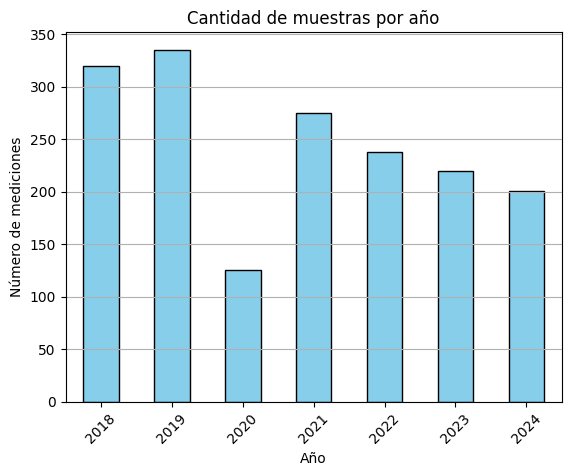

In [126]:
##  Numero de mediciones por año
icam['año'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de muestras por año')
plt.xlabel('Año')
plt.ylabel('Número de mediciones')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

Aunque en el 2018 y el 2019 tienen mayor numero de mediciones, dichas mediiones no tienen más de 6 contaminantes analizados en sus muestras, lo que explica por que en la confianza, la calidad de las muestras. es decir son mas mediciones pero de menos calidad.
La calidad de las muestras y el numero de variables tiene un incremento considerable a lo largo de los años.

<h3 id="evolucion-icam">2. Evolución del ICAM año tras año por departamento </h3>
Criterio para analizar el ICAM

![image](image.png)


In [127]:
###promedio del icam por año
icam_por_año = icam.groupby('año')['icam'].mean().sort_values(ascending=False)
icam_por_año

año
2024    56.486517
2023    55.574727
2022    52.105210
2021    41.924582
2020    33.377937
2019    29.748358
2018    28.574125
Name: icam, dtype: float64

El año con un mejor indice de calidad icam en promedio fue el 2024. Sin embargo, este valor no se aleja mucho del icam en el 2023 y 2022. Esto no necesariamente indica una mejor calidad del agua, sino que representa el mejoramiento y calidad del muestreo según la confianza en la grafica.2

<h3 id="concentracion">3. Gráfica de la concentraicon de todos los contaminantes a lo largo de los años <h3>

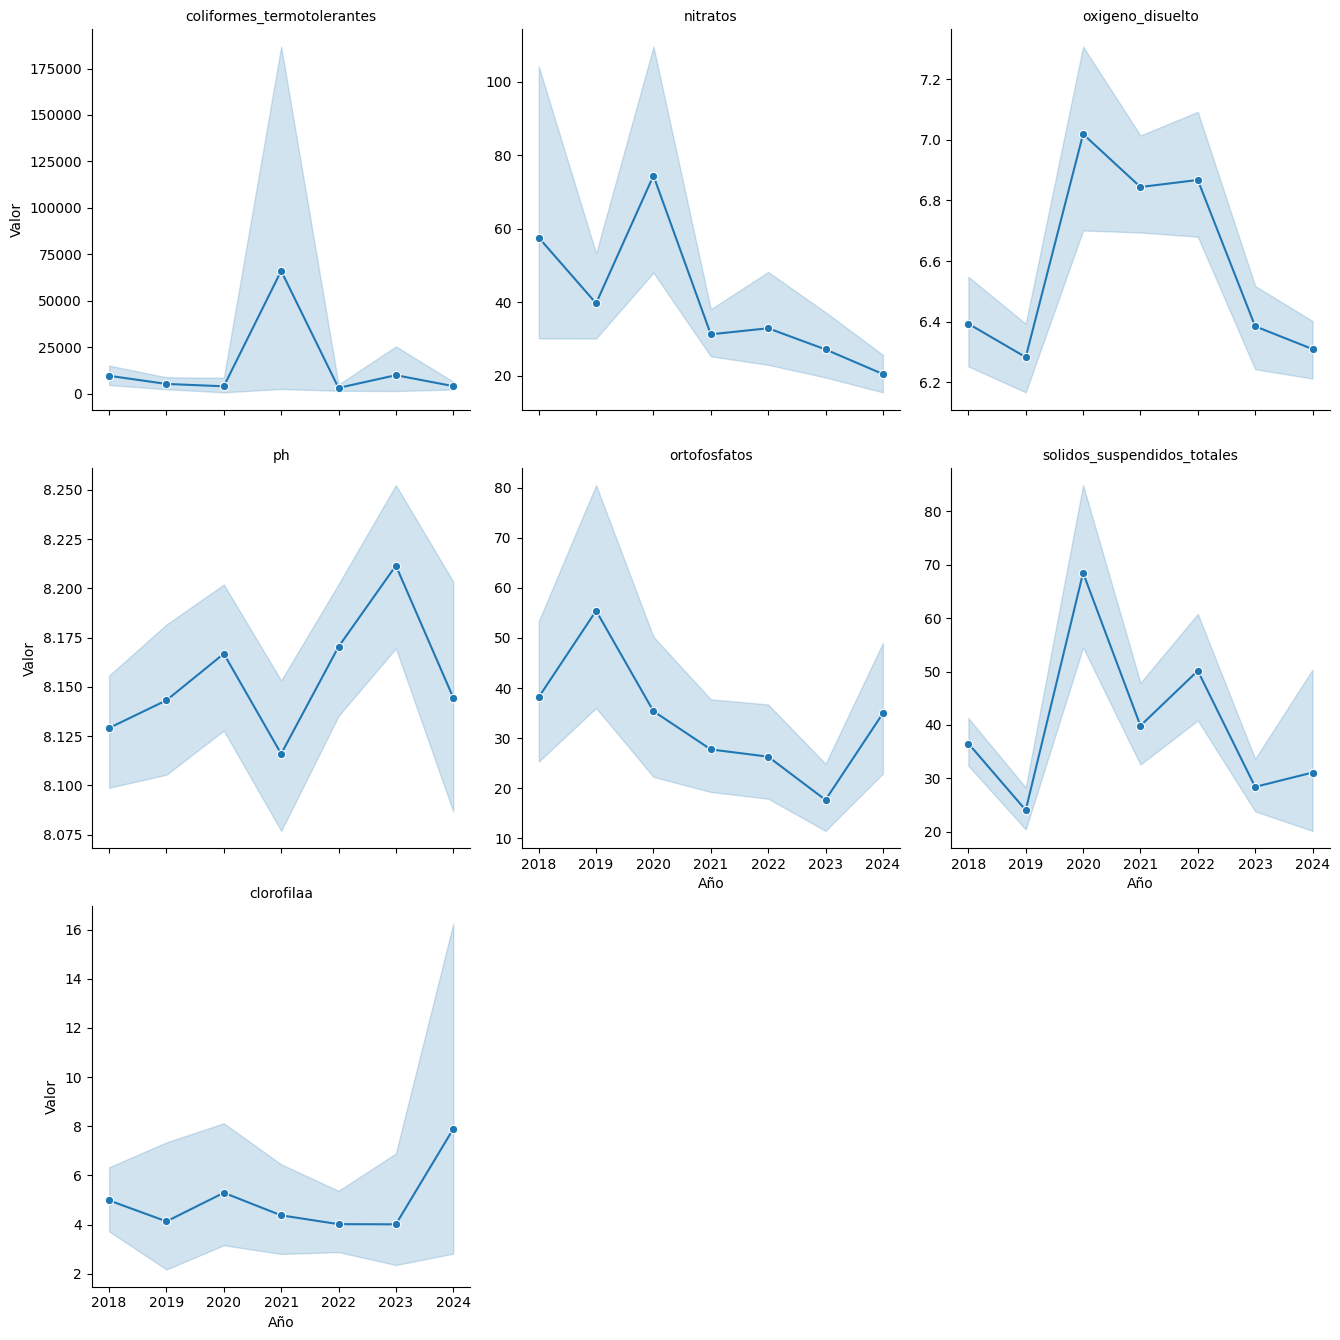

In [154]:
#  Grafica de la concentraicon de contaminantes a lo largo de los años
contaminantes = [ 
    'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa'
]

# se crea un mini df con los contaminantes y pasar a formato largo
df_plot = icam[['año'] + contaminantes] 
df_melted = df_plot.melt(id_vars='año', value_vars=contaminantes, var_name='variable', value_name='valor') ###Usa melt para poner los contaminantes en una sola columna.

# Crear 7 paneles (uno por variable)
g = sns.FacetGrid(df_melted, col='variable', col_wrap=3, sharey=False, height=4.5)
g.map(sns.lineplot, 'año', 'valor', marker='o')

# Ajustes visuales
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Valor")
plt.tight_layout()
plt.show()

<h3>3.1 Hacer lo mismo pero por contaminante por departamento (salen 84 valores y se deben organizarde mayor a nemor)<h3>

In [ ]:
###

________________________________________________________________________________________________________________________________________________________________________________________________<h3 id="ICAM">4. Comportamiento de la calidad del ICAM por contaminante. Mejora o empeora?</h3>

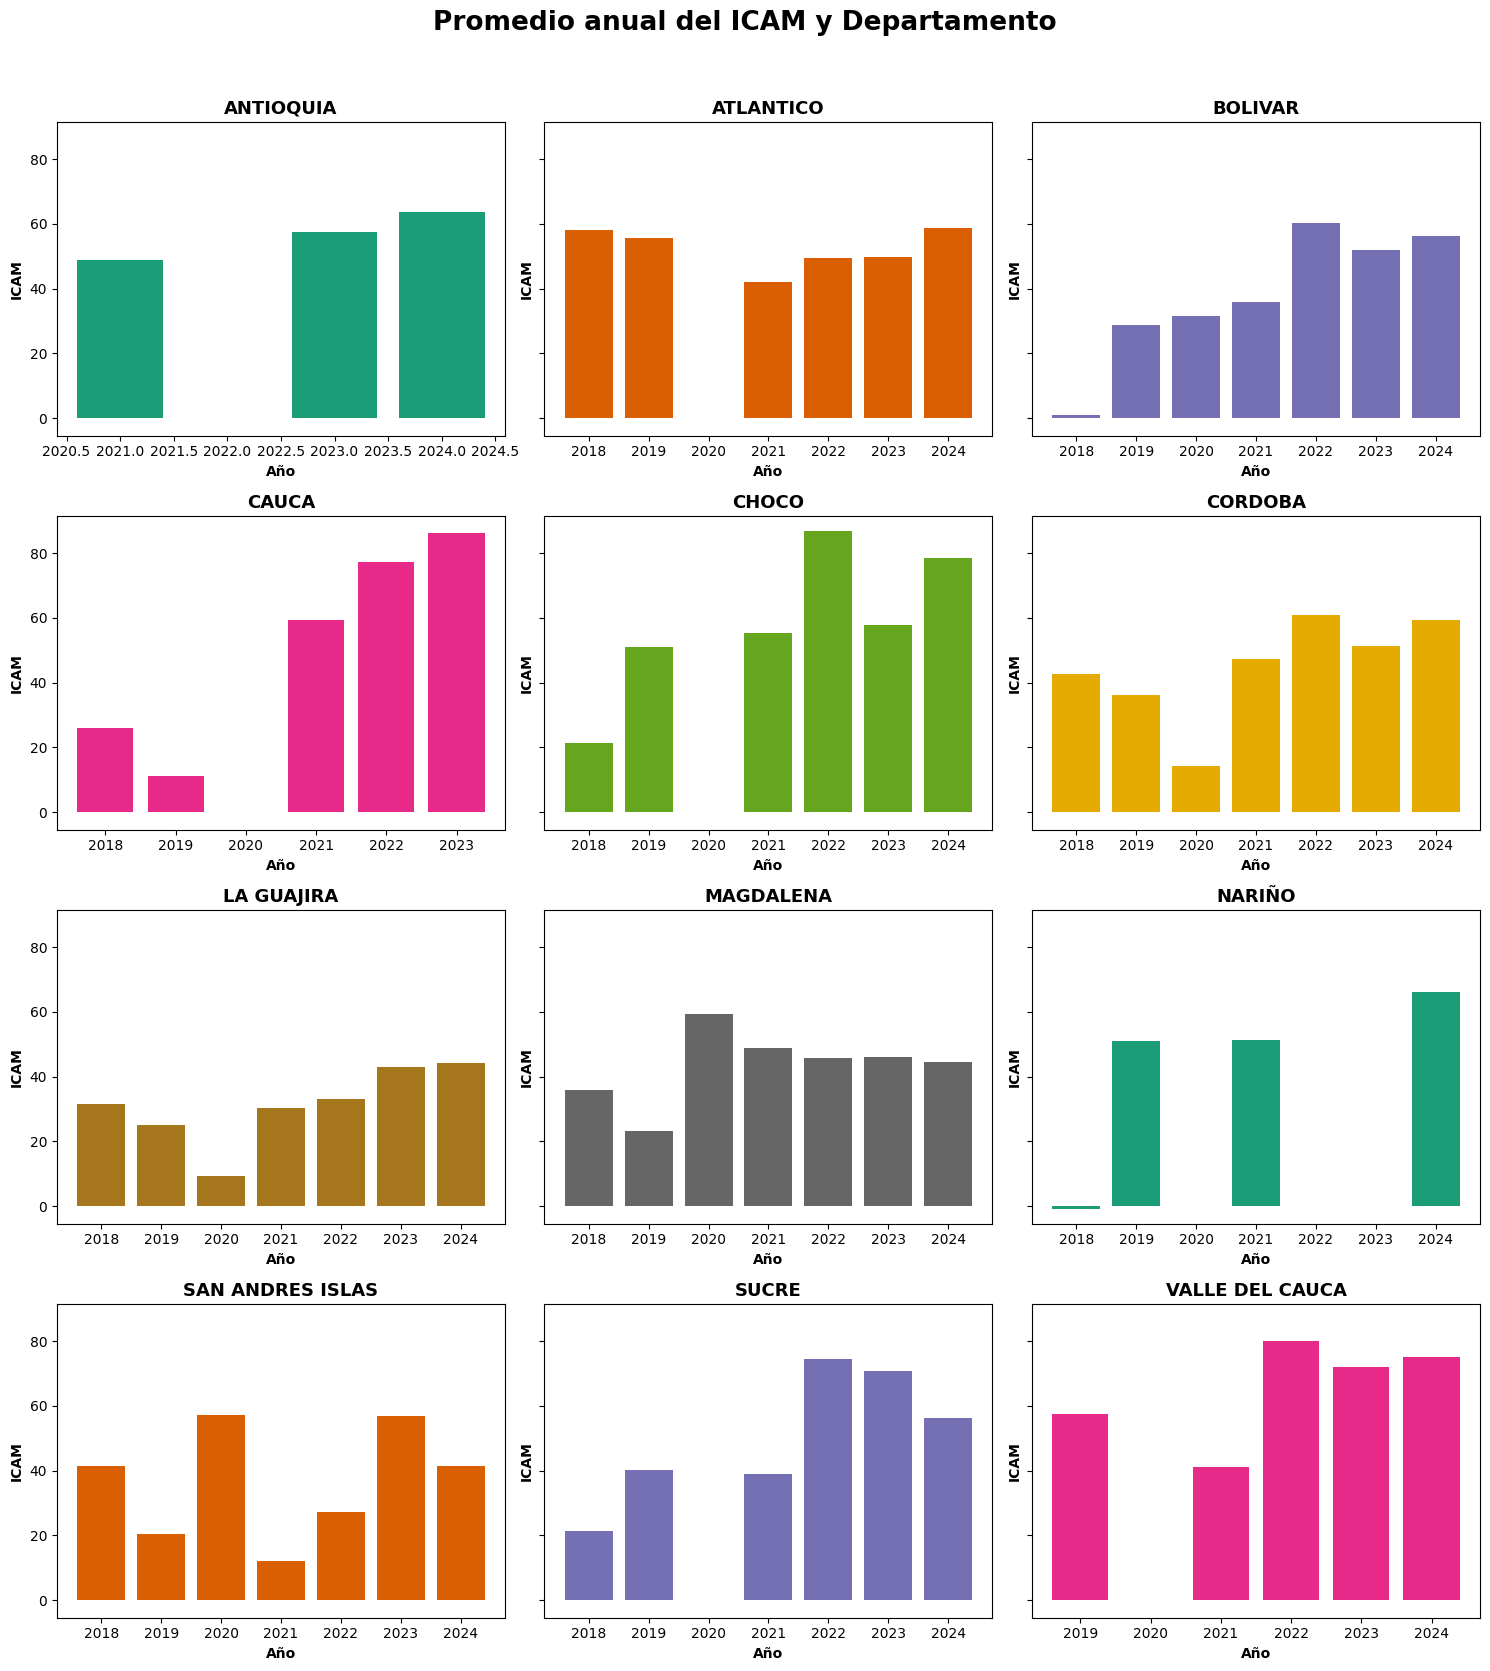

In [129]:
icam_agrupada = icam.groupby(['departamento', 'año'])['icam'].mean().reset_index()   
departamentos = icam_agrupada['departamento'].unique()[:12]          # Lista de los primeros 12 departamentos
colors = sns.color_palette("Dark2", n_colors=len(departamentos))    # Usa una paleta de 12 colores
color_map = dict(zip(departamentos, colors))                        # Asociar un color a cada departamento

fig, axes = plt.subplots(4, 3, figsize=(15, 17), sharex=False, sharey=True)    # Crear subplots (varias grafias)
axes = axes.flatten()

for i, depto in enumerate(departamentos):
    data_depto = icam_agrupada[icam_agrupada['departamento'] == depto]
    color = color_map[depto]

     # Histograma personalizado por departamento
    axes[i].bar(data_depto['año'].astype(float), data_depto['icam'], color=color)

    # Título y etiquetas 
    axes[i].tick_params(axis='x')
    axes[i].set_title(depto,  fontsize=13 , fontweight='bold')    ## fontweight para la letra en negrilla
    axes[i].set_xlabel('Año', fontweight='bold' )
    axes[i].set_ylabel('ICAM',  fontweight='bold')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y' )
    axes[i].set_axisbelow(True)
    axes[i].xaxis.grid(False)
 
# Eliminar subplots vacíos si hay menos de 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Promedio anual del ICAM y Departamento', fontsize=19, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

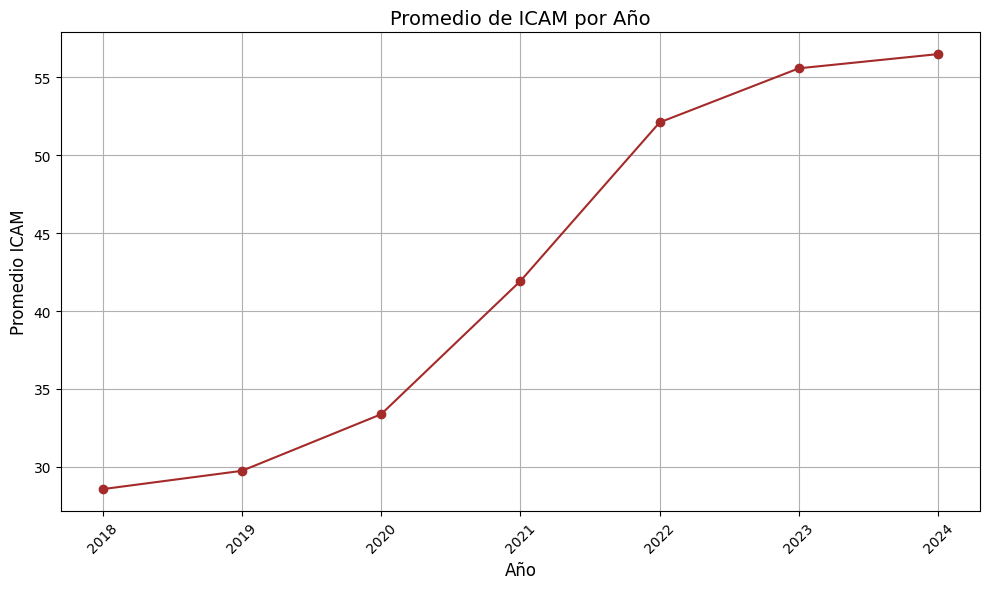

In [155]:
# Agrupamos por año y calculamos el promedio de icam
icam_por_anio = icam.groupby('año')['icam'].mean().reset_index()

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(icam_por_anio['año'], icam_por_anio['icam'], marker='o', linestyle='-', color='brown')
plt.title('Promedio de ICAM por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio ICAM', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

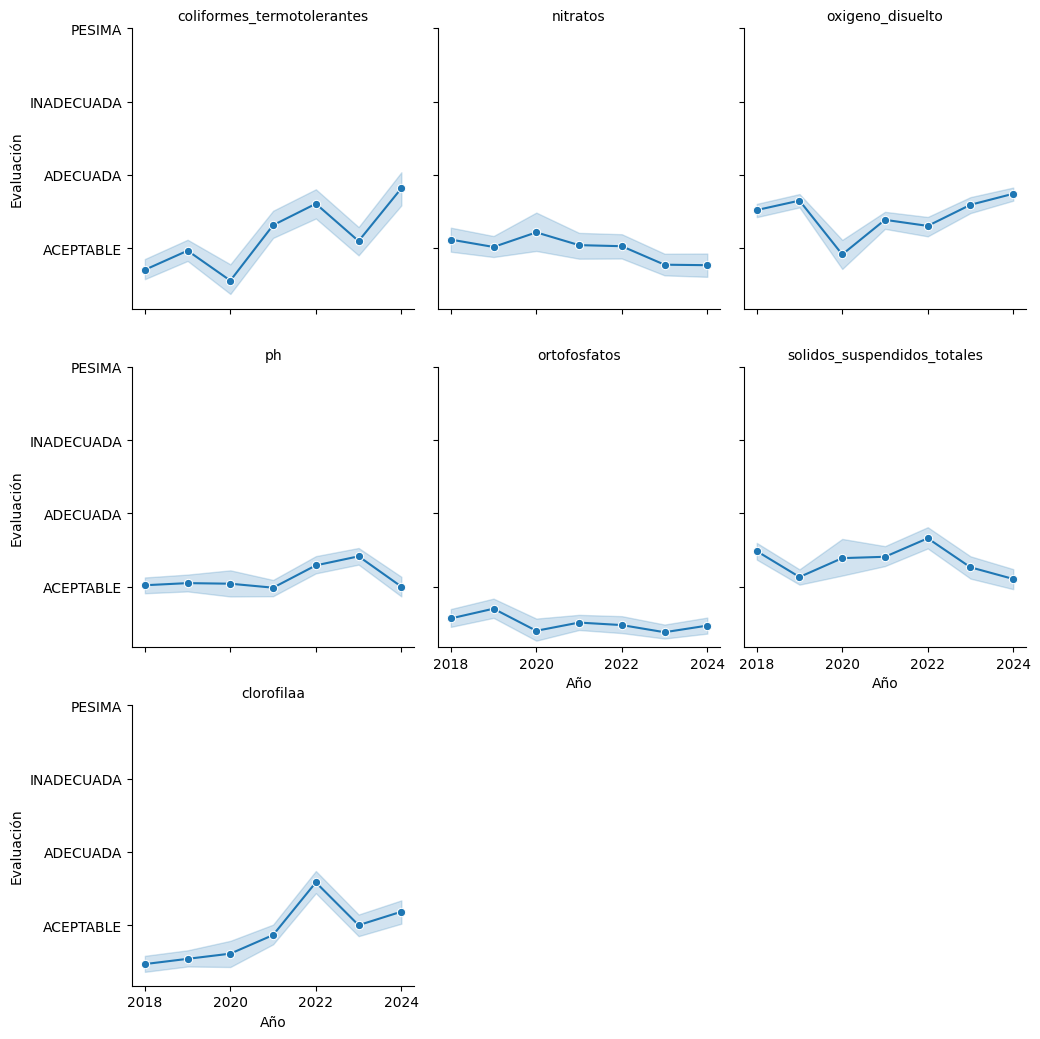

In [153]:
# Listas originales de contaminantes numéricos y evaluaciones categóricas
Contaminantes = [ 
    'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa'
]

eContaminantes = [  
    'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
    'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 
    'evaluacion_ortofosfatos', 'evaluacion_sst',
    'evaluacion_clorofilaa'
]

# Limpiar texto y convertir a mayúsculas (en caso de que haya valores sucios)
icam[eContaminantes] = icam[eContaminantes].apply(lambda col: col.str.strip().str.upper())

# Obtener categorías únicas sin NaN (limpiar valores NaN antes de ordenar)
categorias_unicas = pd.unique(icam[eContaminantes].values.ravel())
categorias_ordenadas = sorted([c for c in categorias_unicas if pd.notna(c)])

# Convertir las columnas de evaluaciones categóricas a un tipo de dato categórico ordenado
for col in eContaminantes:
    icam[col] = pd.Categorical(icam[col], categories=categorias_ordenadas, ordered=True)

# Crear DataFrames en formato largo (long format) para valores numéricos y evaluaciones
df_valores = icam[['año'] + Contaminantes].melt(id_vars='año', var_name='contaminante', value_name='valor_contaminante')
df_eval = icam[['año'] + eContaminantes].melt(id_vars='año', var_name='evaluacion', value_name='categoria_evaluacion')

# Emparejar las evaluaciones con sus contaminantes correspondientes
df_eval['contaminante'] = df_valores['contaminante']

# Guardar los nombres de las categorías (evaluaciones)
df_eval['categoria'] = df_eval['categoria_evaluacion']  

# Convertir las categorías a números para que se pueda graficar en un gráfico de líneas
df_eval['categoria_evaluacion'] = df_eval['categoria_evaluacion'].cat.codes  # Convertir a valores numéricos

# Graficar usando lineplot
g = sns.FacetGrid(df_eval, col='contaminante', col_wrap=3, sharey=True, height=3.5)
g.map_dataframe(sns.lineplot, x='año', y='categoria_evaluacion', marker='o')

# Restaurar etiquetas en el eje Y con los nombres de las categorías
for ax in g.axes.flat:
    ax.set_yticks(range(len(categorias_ordenadas)))
    ax.set_yticklabels(categorias_ordenadas)

# Ajustes visuales
g.set_titles("{col_name}")
g.set_axis_labels("Año", "Evaluación")
plt.tight_layout()
plt.show()

<h3 id="">4.1. Grafica de la concentraicon de contaminantes a lo largo de los años

In [131]:
df_melted

,año,variable,valor
0,2018,coliformes_termotolerantes,4900.00
1,2018,coliformes_termotolerantes,79.00
2,2018,coliformes_termotolerantes,540.00
3,2018,coliformes_termotolerantes,17.62
4,2018,coliformes_termotolerantes,11000.00
...,...,...,...
12000,2024,clorofilaa,1.50
12001,2024,clorofilaa,1.00
12002,2024,clorofilaa,0.55
12003,2024,clorofilaa,0.85


 ___________________________________________________________________________________________________________________________________________________________
 <h3 id="matriz">5. ¿Qué variable está más asociada a un bajo ICAM? (Matriz de correlacion)</h3>


In [133]:
corr_variables = ['icam', 'coliformes_termotolerantes','nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa', 'confianza','num_variables']
corr = icam[corr_variables].corr()
corr

,icam,coliformes_termotolerantes,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,clorofilaa,confianza,num_variables
icam,1.000000,-0.005188,-0.041392,0.033753,-0.002215,-0.177983,-0.082131,-0.009568,0.698080,0.705686
coliformes_termotolerantes,-0.005188,1.000000,0.007971,-0.022319,-0.017299,0.004811,0.007367,0.009960,0.019611,0.021534
nitratos,-0.041392,0.007971,1.000000,0.019519,-0.085733,0.202481,0.065125,0.068022,0.024435,0.032981
oxigeno_disuelto,0.033753,-0.022319,0.019519,1.000000,0.212834,-0.078945,0.180946,0.152160,-0.002666,-0.007777
ph,-0.002215,-0.017299,-0.085733,0.212834,1.000000,-0.071039,-0.033688,-0.031987,-0.045953,-0.059290
ortofosfatos,-0.177983,0.004811,0.202481,-0.078945,-0.071039,1.000000,0.037077,0.047636,-0.112241,-0.120510
solidos_suspendidos_totales,-0.082131,0.007367,0.065125,0.180946,-0.033688,0.037077,1.000000,0.524395,0.066529,0.065485
clorofilaa,-0.009568,0.009960,0.068022,0.152160,-0.031987,0.047636,0.524395,1.000000,0.040949,0.039249
confianza,0.698080,0.019611,0.024435,-0.002666,-0.045953,-0.112241,0.066529,0.040949,1.000000,0.994014
num_variables,0.705686,0.021534,0.032981,-0.007777,-0.059290,-0.120510,0.065485,0.039249,0.994014,1.000000


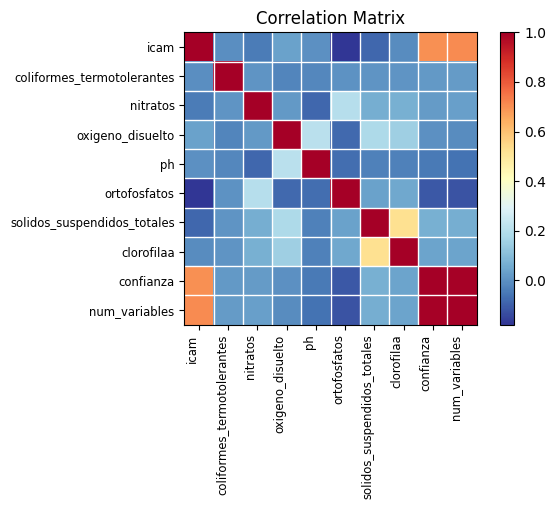

In [134]:
## La confianza ...
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.xticks(rotation=90)
plt.show()

In [135]:
icam[['nitratos', 'icam']].corr()

,nitratos,icam
nitratos,1.000000,-0.041392
icam,-0.041392,1.000000


In [136]:
pd.unique(icam['icam_calificacion'])        


array(['INADECUADA', 'ACEPTABLE', 'ADECUADA', 'PESIMA', 'OPTIMA',
       'NO REPORTADO'], dtype=object)

____________________________________________________________________________________________________________________________________________________________
<h3 id="dispersion">7. Gráficas de dispersión (scatter plots) con color según calificación.</h3>

____________________________________________________________________________________________________________________________________________________________
<h3 id="mapa">8. Mapa de Geo-referenciacion de las estaciones.</h3>

In [138]:
###!pip install folium
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[icam.latitud.mean(), icam.longitud.mean()], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)


for i, row in icam.iterrows():                             
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],     ###Cada row es una fila del df, y puedes acceder a sus valores por nombre de columna
        radius=5,                                       ## radio del circulo en el punto de
        color='blue',                                   ###En folium.CircleMarker(), los argumentos radius y popup controlan la apariencia y la interactividad de los marcadores circulares del mapa
        fill=True,                                      ### fill en folium.CircleMarker controla si el interior del círculo estará relleno con color o no
        popup=f"Año: {row['año']}, pH: {row['ph']}"      ###Es el texto o contenido que se muestra al hacer clic en el marcador
    ).add_to(marker_cluster)          
    from IPython.display import display              ##para poder imprimir el mapa
display(m)

<h3 id="calor">8.1 Mapa de calor</h3>

In [157]:
#mapa de calor
#cross_tab = pd.crosstab(index=icam['icam_calificacion'], columns=icam['evaluacion_nitratos'])

# Heatmap
#sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')


In [140]:
## Ver si la correlación entre icam y num_variables cambia por año:
icam.groupby('año')[['icam', 'num_variables']].corr().iloc[0::2, -1]

año       
2018  icam    0.722476
2019  icam    0.772563
2020  icam    0.661960
2021  icam    0.694959
2022  icam    0.667597
2023  icam    0.575453
2024  icam    0.523150
Name: num_variables, dtype: float64

In [ ]:
###promedio del icam por año
icam_por_año = icam.groupby('año')['icam'].mean().sort_values(ascending=False)
icam_por_año

año
2024    56.486517
2023    55.574727
2022    52.105210
2021    41.924582
2020    33.377937
2019    29.748358
2018    28.574125
Name: icam, dtype: float64

____________________________________________________________________________________________________________________________________________________________
<h3 id ="confianza">9. ¿Mayor número de variables medidas implica mejor "confianza" en el ICAM?
  

In [ ]:
#icam['confianza'].unique()
pd.unique(icam['icam_calificacion'])

array(['INADECUADA', 'ACEPTABLE', 'ADECUADA', 'PESIMA', 'OPTIMA',
       'NO REPORTADO'], dtype=object)

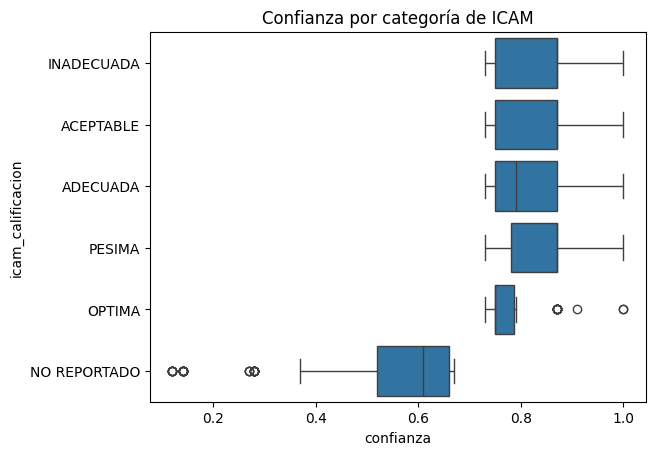

In [ ]:
## confianza vs el ICAM
sns.boxplot(data=icam, x='confianza', y='icam_calificacion')
plt.title('Confianza por categoría de ICAM')

plt.show()

Analisis: 
Este boxplot horizontal muestra cómo varía la confianza. Esta esta asociada a la precisión 
o totalidad del dato en función de la calificación del ICAM.

Todas tienen medianas de confianza bastante altas, cercanas a 0.8 o más
Distribuciones razonablemente amplias, lo que indica cierta variabilidad en la confianza.
La calidad del dato es relativamente buena incluso en registros con mala calidad de agua, lo que es positivo para el análisis.

No reportado: Esto sugiere que donde no se reportó el ICAM, también la confianza en los datos era baja o inconsistente
conclusion: Hay una relación indirecta entre la calidad de reporte y la confianza: donde no se reportó el ICAM, la confianza también es baja.

 ___________________________________________________________________________________________________________________________________________________________
 <h3 id="scatterplot">9.1.Gráfica Scatter plot entre num_variables vs confianza. Relación entre el número de variables medidas y la confianza </h3>

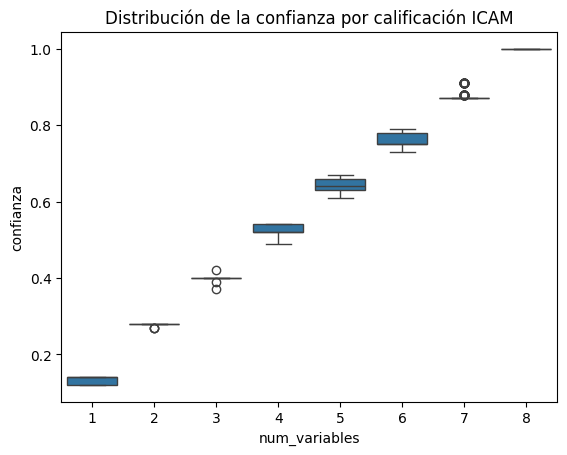

In [ ]:
## grafica de la confianza vs icam (correlacion entre confianza y num_variables)
sns.boxplot(data=icam, x ='num_variables', y ='confianza')
plt.title('Distribución de la confianza por calificación ICAM')
plt.show()

Análisis:
A medida que aumenta el número de variables usadas (num_variables), también lo hace la confianza.
 Esto tiene mucho sentido: más variables ⇒ evaluación más completa ⇒ mayor confianza
-El aumento de la mediana y el estrechamiento de los rangos intercuartílicos sugiere una relación casi lineal entre num_variables y confianza
-Para pocos datos (1 a 3 variables), la confianza es baja y muy variable. A partir de 5 o más variables, la confianza se estabiliza y se vuelve alta
-Con 1 a 4 variables hay muchos outliers, lo que indica que incluso con pocos datos a veces se logra confianza alta, aunque es raro


In [ ]:
## hay 20 estaciones con solo una variable medida y 88 estaciones cada una con 8 variables medidas
icam['num_variables'].value_counts().sort_index()

num_variables
1     20
2     13
3     61
4    184
5    392
6    569
7    388
8     88
Name: count, dtype: int64

 _________________________________________________________________________________________________________________________________________________________
 <h3 id="cajas">9.2.  Numero de variables por año</h3>

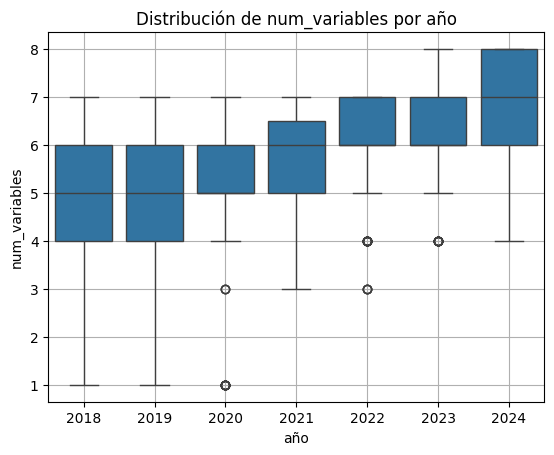

In [ ]:
### Cada medicion por estacion tiene una o varias muestras. Aqui podemos observar que a lo largo de los años
## se han empezado tomar muestras de mas contaminantes (variables)

sns.boxplot(data=icam, x='año', y='num_variables')
plt.title('Distribución de num_variables por año')
plt.grid(True)
plt.show()

In [ ]:
## solo en el 2023 y 2024 se hicieron muestreos con 8 variables. y solo en 2018, 2019 y 2020 se hicieron muestreos con 1 variable
icam.groupby('año')['num_variables'].agg(['min', 'max', 'mean', 'count'])

,min,max,mean,count
año,,,,
2018,1,7,5.171875,320
2019,1,7,5.194030,335
2020,1,7,5.015873,126
2021,3,7,5.785455,275
2022,3,7,6.029412,238
2023,4,8,6.254545,220
2024,4,8,6.616915,201


In [ ]:
## los tres departamentos con mas 

____________________________________________________________________________________________________________________________________________________________
<h3 id="conclusiones"> 10. Conclusiones </h3>

-Aunque se hicieron mas muestreosen lso primeros años, se tomaron menos variables en estos mismos años asi que la confianza fue menor: Es decir, aunque los ultimos años tienen menos muestreos, la calidad de estos muestreos es mejor.

-Hay una relación indirecta entre la calidad de reporte y la confianza: donde no se reportó el ICAM, la confianza también es baja.
En cambio, las categorías reportadas (incluso las malas como PÉSIMA) tienen mayor confianza, lo que sugiere que los datos fueron medidos de forma relativamente sólida

-El número de variables usadas en el ICAM tiene un impacto directo y positivo sobre la confianza del resultado, por lo tanto, se sugiere usar un umbral mínimo  ≥ 6 variables para considerar válido o confiable un índice ICAM.

-

<h3>Recomendaciones </h3>

- Realizar muestras que comprendan más de 6 variables en su analisis, para mejorar la confianza de los analisis
-


